In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data', one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [11]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [12]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.random_normal([256], stddev=0.01))
L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.random_normal([1, 256], stddev=0.01))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))
L1 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b3 = tf.Variable(tf.random_normal([1, 10], stddev=0.01))
model = tf.add(tf.matmul(L2, W3), b3)

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8}) 
        total_cost += cost_val
    
    print('Epoch:', '%4d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch:    1 Avg. cost = 0.416
Epoch:    2 Avg. cost = 0.157
Epoch:    3 Avg. cost = 0.108
Epoch:    4 Avg. cost = 0.083
Epoch:    5 Avg. cost = 0.068
Epoch:    6 Avg. cost = 0.058
Epoch:    7 Avg. cost = 0.048
Epoch:    8 Avg. cost = 0.043
Epoch:    9 Avg. cost = 0.038
Epoch:   10 Avg. cost = 0.032
Epoch:   11 Avg. cost = 0.032
Epoch:   12 Avg. cost = 0.027
Epoch:   13 Avg. cost = 0.026
Epoch:   14 Avg. cost = 0.023
Epoch:   15 Avg. cost = 0.024
최적화 완료!


In [16]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [17]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

정확도: 0.9818


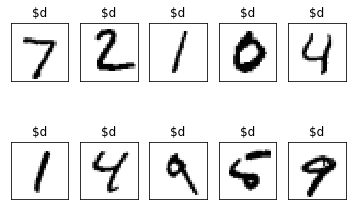

In [25]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y:mnist.test.labels, keep_prob: 1})
fig = plt.figure()

for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('$d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()